In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc_file('../fig/matplotlibrc')
import yaml
import os, sys
sys.path.insert(0, os.path.abspath('src'))
from data_object import data_object

clustering to be plotted

In [9]:
path_cfg = '/global/homes/s/siyizhao/projects/fihobi/hod-variation/configs/QSO-fnl100/z3_base-dv.yaml'
path_z3 = '/pscratch/sd/s/siyizhao/data_learnCosm/AbacusMocks/QSOz3-fnl100bf/Abacus_pngbase_c302_ph000/z1.550/galaxies_rsd/clustering.npy'
path_z3_dv = '/pscratch/sd/s/siyizhao/data_learnCosm/AbacusMocks/QSOz3-fnl100bf/Abacus_pngbase_c302_ph000/z1.550/galaxies_rsd_dv/clustering.npy'
clus_z3 = np.load(path_z3, allow_pickle=True).item()['QSO_QSO']
clus_z3_dv = np.load(path_z3_dv, allow_pickle=True).item()['QSO_QSO']

observation data

In [10]:
config_full=yaml.safe_load(open(path_cfg))
HOD_params = config_full.get("HOD_params", {})
clustering_params = config_full.get("clustering_params", {})
data_params = config_full.get("data_params", {})
data_obj = data_object(data_params, HOD_params, clustering_params)

manage data

In [11]:
# Observations (background only)
obs_wp  = np.asarray(data_obj.wp['QSO_QSO'])
obs_xi  = np.asarray(data_obj.xi02['QSO_QSO'])
obs = {'wp': obs_wp, 'xi0': obs_xi[:,0], 'xi2': obs_xi[:,1]}
errall_d=np.sqrt(np.diag(data_obj.cov['QSO_QSO']))

err_obs={}
the_z3={}
the_z3_dv={}

istart=0
err_obs['wp']=errall_d[istart:istart+len(obs['wp'])]
the_z3['wp']=clus_z3[istart:istart+len(obs['wp'])]
the_z3_dv['wp']=clus_z3_dv[istart:istart+len(obs['wp'])]

istart+=len(obs['wp'])
err_obs['xi0']=errall_d[istart:istart+len(obs['xi0'])]
the_z3['xi0']=clus_z3[istart:istart+len(obs['xi0'])]
the_z3_dv['xi0']=clus_z3_dv[istart:istart+len(obs['xi0'])]

istart+=len(obs['xi0'])
err_obs['xi2']=errall_d[istart:istart+len(obs['xi2'])]        
the_z3['xi2']=clus_z3[istart:istart+len(obs['xi2'])]
the_z3_dv['xi2']=clus_z3_dv[istart:istart+len(obs['xi2'])]


plot

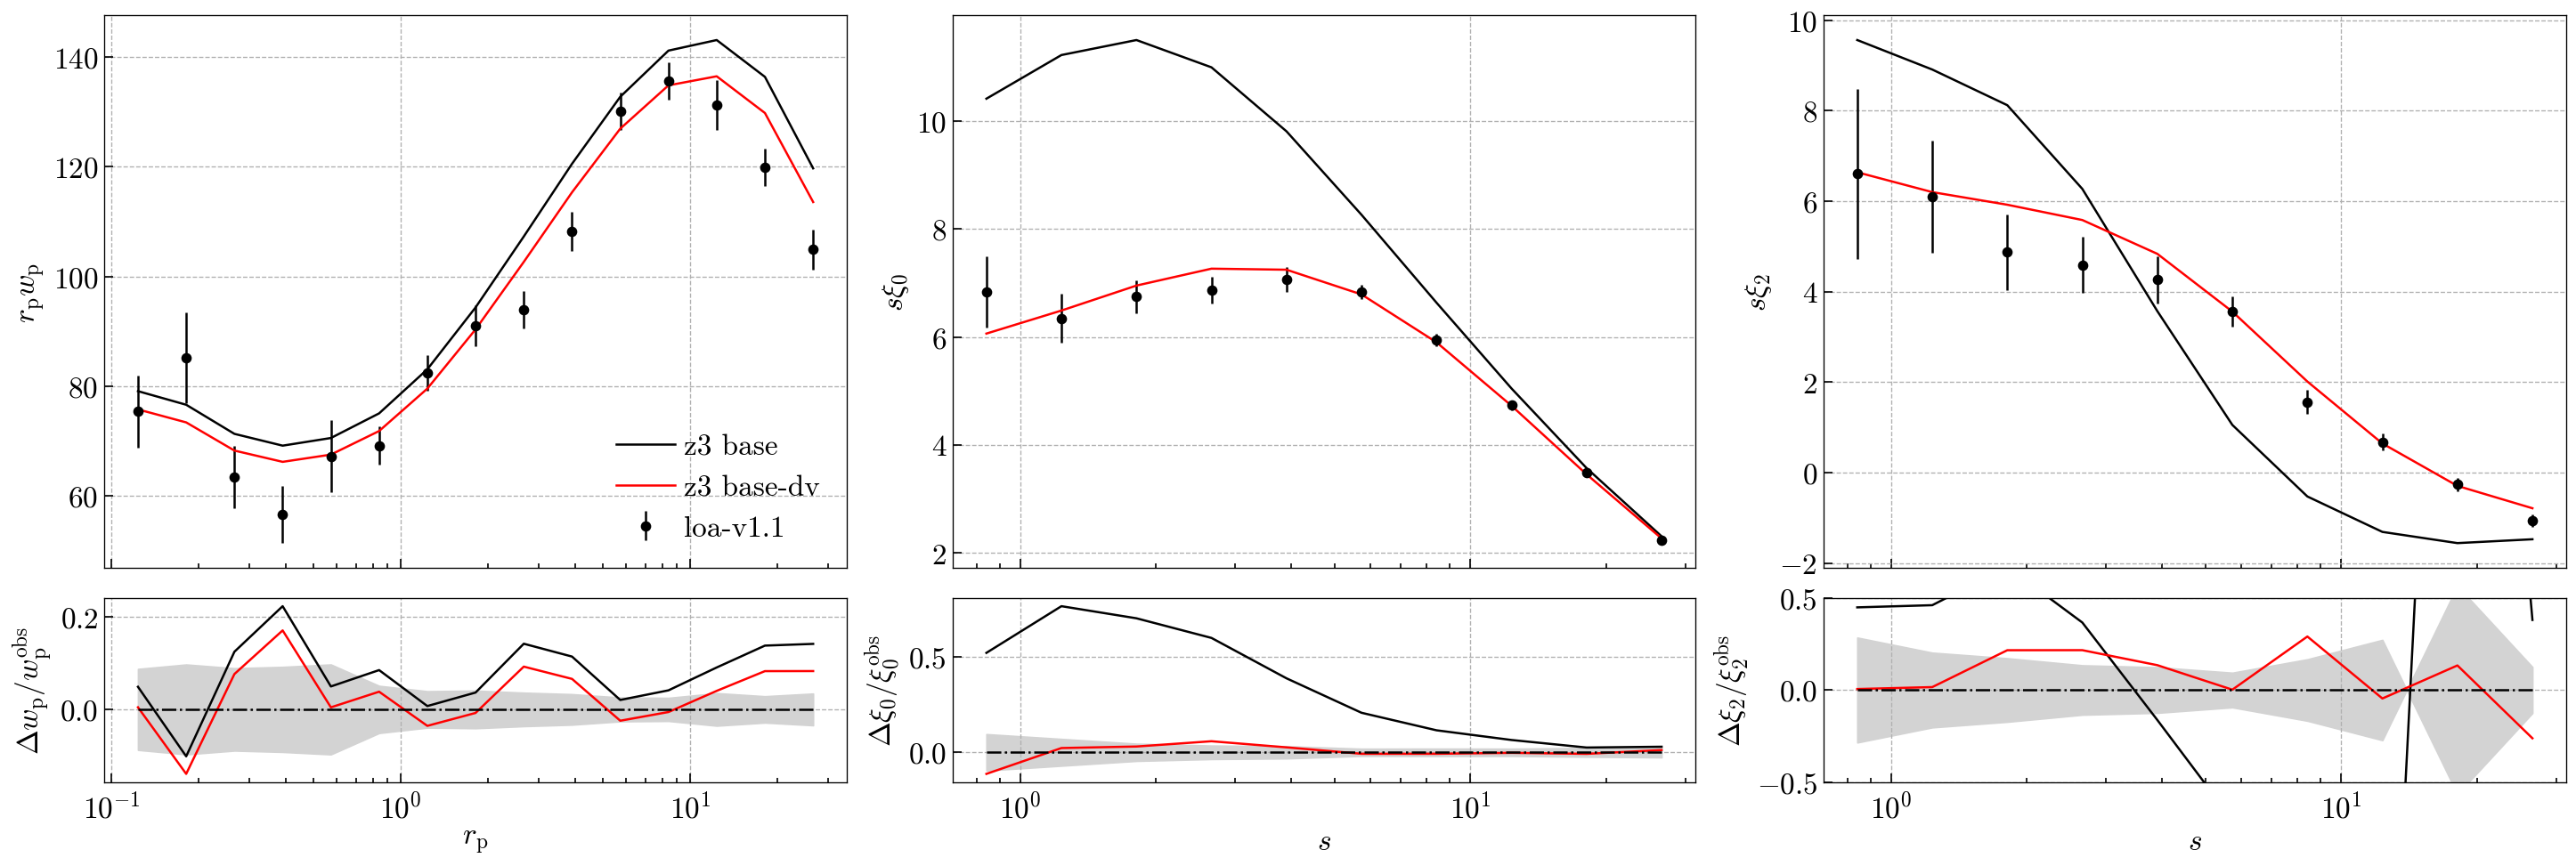

In [13]:
fig, axs = plt.subplots(2,3,constrained_layout=True,sharex='col',figsize=(24,8),gridspec_kw={'height_ratios': [3, 1]})

# x-bins and midpoints
idxwp=np.arange(6,21)
idxxi=np.arange(11,21)
rpbins=np.geomspace(0.01,100,25)
rpbinsmid=(rpbins[1:]+rpbins[:-1])/2
rp_wp=rpbinsmid[idxwp]
s_xi=rpbinsmid[idxxi]

ctypes=['wp','xi0','xi2']
y0labels=[r'$r_{\rm p} w_{\rm p}$',r'$s \xi_{0}$',r'$s \xi_{2}$']
y1labels=[r'$\Delta w_{\rm p}/w_{\rm p}^{\rm obs}$',r'$\Delta \xi_{0}/\xi_{0}^{\rm obs}$',r'$\Delta \xi_{2}/\xi_{2}^{\rm obs}$']
xlabels=[r'$r_{\rm p}$',r'$s$',r'$s$']

# Plot    
for i,ctype in enumerate(ctypes):
    if ctype=='wp':
        x=rp_wp
    else:
        x=s_xi
    ## obs
    axs[0,i].errorbar(x,x*obs[ctype],yerr=x*err_obs[ctype],marker='o',ls='',color='black',label='loa-v1.1')
    axs[1,i].fill_between(x,(-err_obs[ctype])/obs[ctype],(err_obs[ctype])/obs[ctype],color='lightgray')
    ## models
    axs[0,i].plot(x,x*the_z3[ctype],color='black',label='z3 base')
    axs[1,i].plot(x,(the_z3[ctype]-obs[ctype])/obs[ctype],color='black')
    axs[0,i].plot(x,x*the_z3_dv[ctype],color='red',label='z3 base-dv')
    axs[1,i].plot(x,(the_z3_dv[ctype]-obs[ctype])/obs[ctype],color='red')
    axs[0,i].set_xscale('log')
    axs[1,i].set_xscale('log')
    axs[0,i].set_ylabel(y0labels[i],fontsize=20)
    axs[1,i].set_ylabel(y1labels[i],fontsize=20)
    axs[0,i].grid(linestyle='--')
    axs[1,i].grid(linestyle='--')        
    axs[0,i].tick_params(labelsize=20)
    axs[1,i].tick_params(labelsize=20)        
    axs[1,i].set_xlabel(xlabels[i],fontsize=20)
    axs[1,i].plot(x,np.zeros_like(x),ls='-.',color='black')    
axs[1,2].set_ylim(-0.5,0.5)
axs[0,0].legend(frameon=False,fontsize=20,loc=4)
plt.show()